In [1]:
import pandas as pd
import numpy as np
from neuralprophet.forecaster_additional_models import LSTM

In [2]:
data_location = "../"
df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8


# LSTM

LSTM model has analogous hyperparameters to NP:
    n_lags: defines the sequence length
    n_forecasts: defines how many timestamps in the future we predict
    num_hidden_layers: number of layers in LSTM
    d_hidden: dimension of hidden layers in LSTM

It shares the training configuration parameters with NP.


lstm_bias = True,
lstm_biderectional = False

In [3]:
m = LSTM(n_lags = 10,
            n_forecasts=3,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_biderectional = False)

In [9]:
metrics_df = m.fit(df.iloc[:-10], freq = '5min', validate_each_epoch=True)

Model has already been fitted. Re-fitting will produce different results.

  0%|          | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 19.5 K
1 | linear    | Linear       | 195   
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
19.7 K    Trainable params
0         Non-trainable params
19.7 K    Total params
0.079     Total estimated model params size (MB)
WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **k

Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [10]:
metrics_df

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,0.015009,5.637412,89.535995,0.000119,0.554691,0.710478
1,0.000921,1.691861,5.492121,0.000072,0.462167,0.430831
2,0.000757,1.520941,4.511328,0.000072,0.432770,0.428241
3,0.000588,1.338946,3.508562,0.000067,0.420622,0.402214
4,0.000392,1.068889,2.337829,0.000099,0.511955,0.590374
5,0.000257,0.802581,1.529520,0.000070,0.418597,0.415358
6,0.000219,0.701228,1.305854,0.000068,0.468888,0.406772
7,0.000211,0.670338,1.257788,0.000095,0.544103,0.566255
8,0.000202,0.630958,1.202842,0.000140,0.673166,0.833208
9,0.000194,0.598431,1.159629,0.000077,0.448001,0.461315


In [11]:
metrics = m.test(df.iloc[:-10])

WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Testing: 0it [00:00, ?it/s]

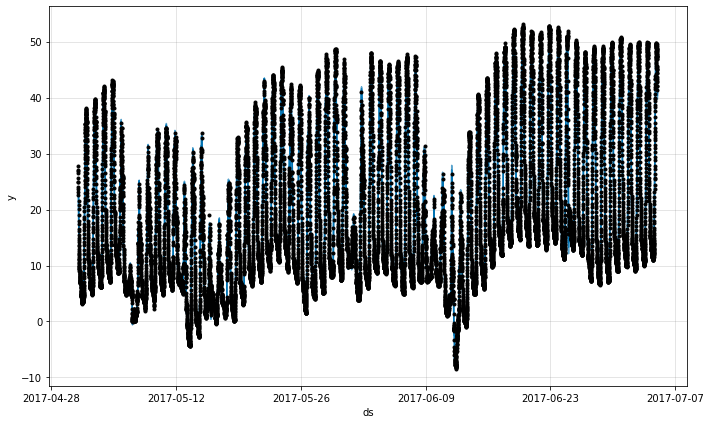

In [14]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

In [16]:
m = LSTM(n_lags=6*12,
            n_forecasts=3*12,
            num_hidden_layers=1,
            d_hidden=64,
            learning_rate=0.1,
            epochs=10,
            batch_size=None,
            loss_func="Huber",
            optimizer="AdamW",
            train_speed=None,
            normalize="auto",
            impute_missing=True,
            lstm_bias = True,
            lstm_biderectional = False)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
  0%|          | 0/10 [00:00<?, ?it/s]GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


  | Name      | Type         | Params
-------------------------------------------
0 | lstm      | LSTM         | 35.3 K
1 | linear    | Linear       | 2.3 K 
2 | loss_func | SmoothL1Loss | 0     
-------------------------------------------
37.7 K    Trainable params
0         Non-trainable params
37.7 K    Total params
0.151     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/fds/neural_prophet/venv/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)



Training: 0it [00:00, ?it/s]

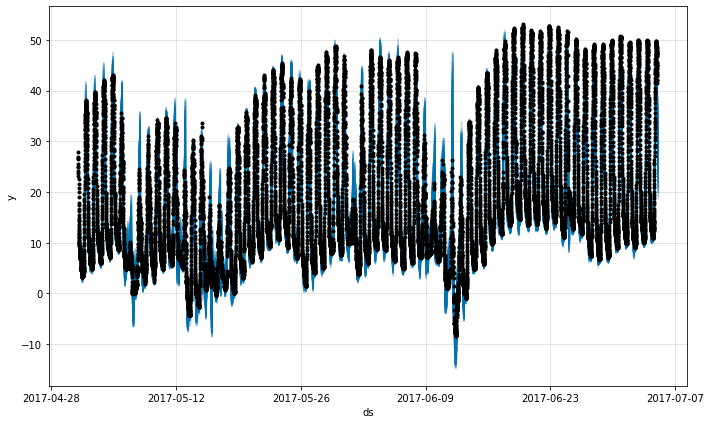

In [17]:
metrics = m.fit(df, freq='5min')
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

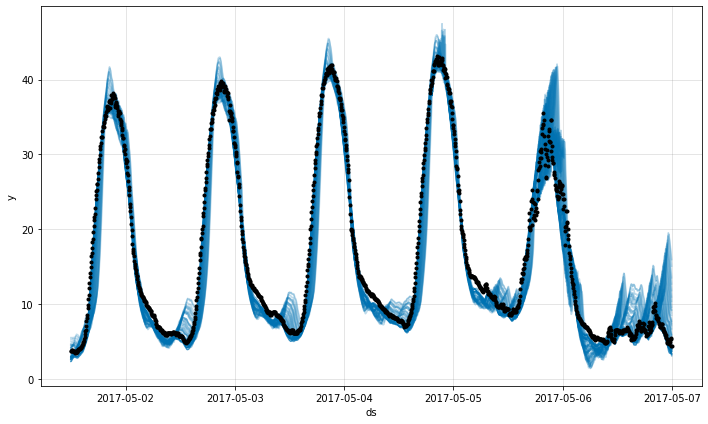

In [18]:
fig = m.plot(forecast[144:6*288])